In [37]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

filename_1 = "googleplaystore.csv"
df = pd.read_csv(filename_1)
df = df[df["Rating"] <= 5.00]
df.columns = map(str.upper, df.columns)
df = pd.concat([df[col].astype(str).str.upper() for col in df.columns], axis=1)
df[["RATING"]] = df[["RATING"]].apply(pd.to_numeric)

df["PRICE"] = df["PRICE"].str.strip('$')
df["PRICE"] = df["PRICE"].str.replace(',', '')
df["PRICE"] = pd.to_numeric(df["PRICE"])

price_category = []
for i in df["PRICE"]: 
    if i == 0: 
        price_category.append("FREE")
    elif i> 0 and i <= 5: 
        price_category.append("MID PRICE")
    elif i > 5: 
        price_category.append("HIGH PRICE")
    else:
        pass
df["PRICE CATEGORY"] = price_category

size_number = []
for i in df["SIZE"]: 
    if i[-1] == "K":
        i = i[:-1]
        i = float(i)
        i = i/1000
        size_number.append(i)
    elif i[-1] == "M": 
        i = i[:-1]
        i = float(i)
        size_number.append(i)
    elif i[-1] == "E":
        i = float("NaN")
        size_number.append(i)
    else:
        pass
df["SIZE NUMBER"] = size_number

size_category = []
for i in df["SIZE NUMBER"]: 
    if i < 1: 
        size_category.append("VERY LIGHT")
    elif i < 2 and i >= 1: 
        size_category.append("LIGHT")
    elif i < 5 and i >= 2: 
        size_category.append("HEAVY")
    elif i >= 5: 
        size_category.append("VERY HEAVY")
    else:
        size_category.append("UNKNOWN")
df["SIZE CATEGORY"] = size_category

In [38]:
df_cat = df[["CATEGORY","RATING"]]
df_con = df[["CONTENT RATING","RATING"]]
df_pri = df[["PRICE CATEGORY","RATING"]]
df_siz = df[["SIZE CATEGORY","RATING"]]

In [39]:
df_cat = df_cat.groupby(by="CATEGORY").median()
df_con = df_con.groupby(by="CONTENT RATING").median()
df_pri = df_pri.groupby(by="PRICE CATEGORY").median()
df_siz = df_siz.groupby(by="SIZE CATEGORY").median()

In [40]:
print("STD for CATEGORY:")
print(df_cat.std())
print("")
print("STD for CONTENT CATEGORY:")
print(df_con.std())
print("")
print("STD for PRICE CATEGORY:")
print(df_pri.std())
print("")
print("STD for SIZE CATEGORY:")
print(df_siz.std())

STD for CATEGORY:
RATING    0.094748
dtype: float64

STD for CONTENT CATEGORY:
RATING    0.132916
dtype: float64

STD for PRICE CATEGORY:
RATING    0.057735
dtype: float64

STD for SIZE CATEGORY:
RATING    0.083666
dtype: float64


In [41]:
df_cat = df_cat.sort_values(by="RATING", ascending=False)
df_con = df_con.sort_values(by="RATING", ascending=False)
df_pri = df_pri.sort_values(by="RATING", ascending=False)
df_siz = df_siz.sort_values(by="RATING", ascending=False)

In [42]:
plt.rcParams['figure.dpi']= 125

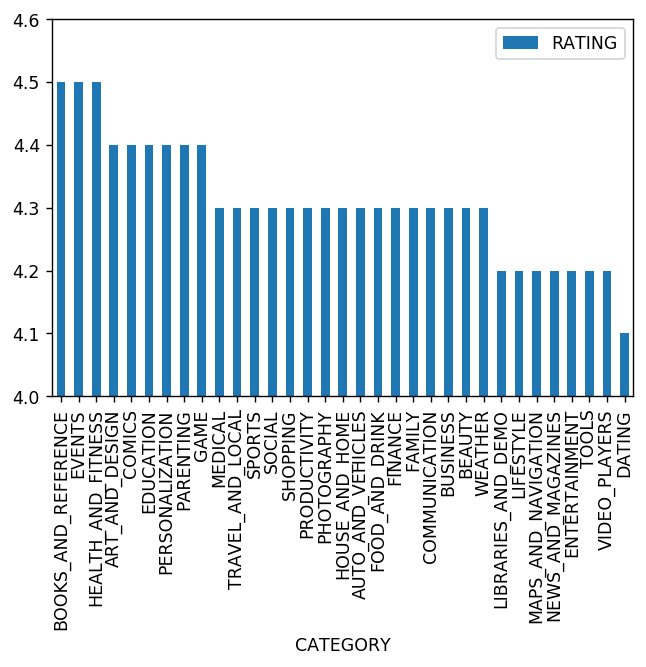

In [47]:
chart = df_cat.plot.bar()
chart.set_ylim(4,4.6)
plt.xticks(rotation=90)
plt.show()

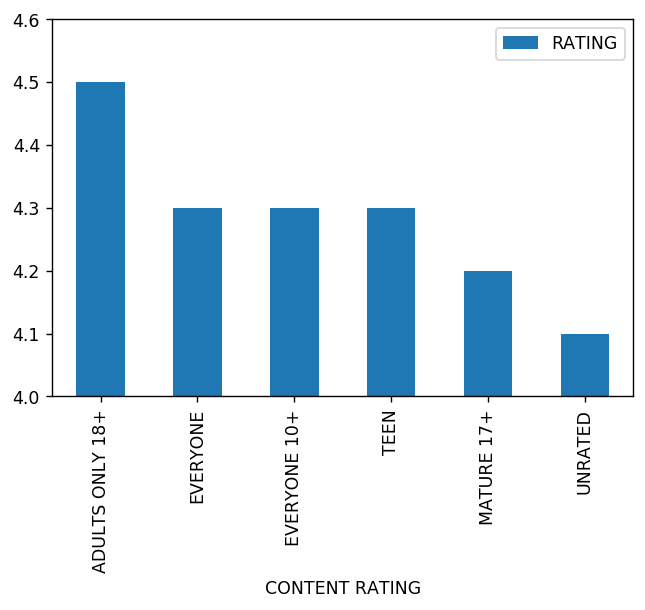

In [48]:
chart = df_con.plot.bar()
chart.set_ylim(4,4.6)
plt.xticks(rotation=90)
plt.show()

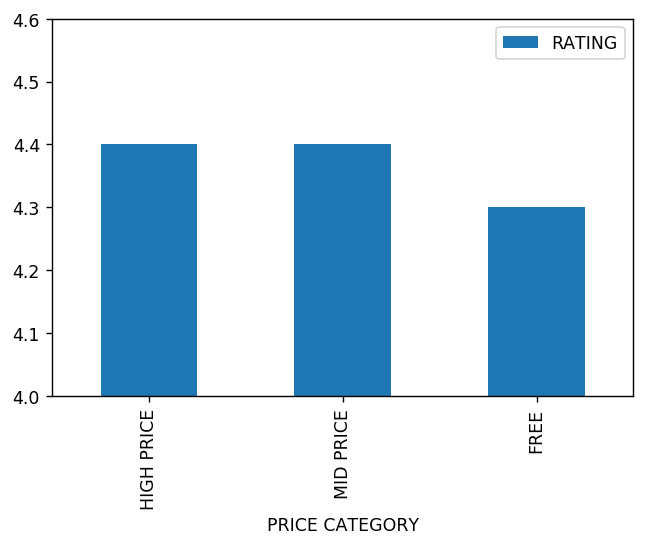

In [49]:
chart = df_pri.plot.bar()
chart.set_ylim(4,4.6)
plt.xticks(rotation=90)
plt.show()

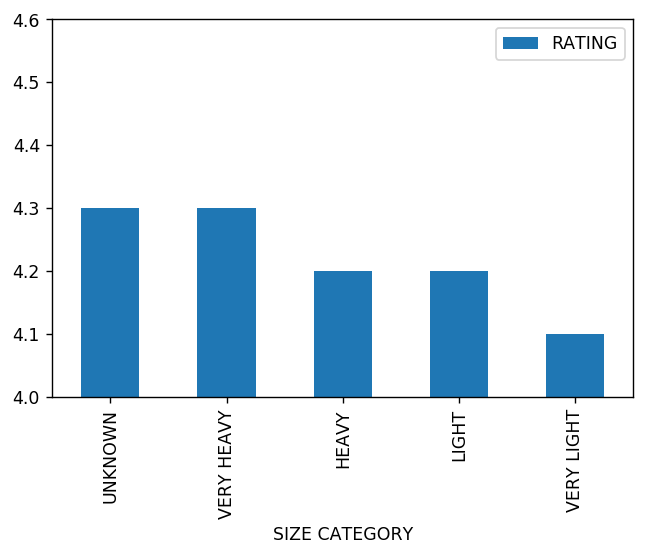

In [50]:
chart = df_siz.plot.bar()
chart.set_ylim(4,4.6)
plt.xticks(rotation=90)
plt.show()